In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import warnings

from auxiliary.occupation_data import *
from auxiliary.occupation_plot import *

***

## Merge data

In [2]:
pgen = load_pgen()
ppathl_gen_paren = merge_data(pgen)

***

## Native German vs 2nd generation of immigrants

In [3]:
forigin_info = pd.read_csv('data/forigin_info.csv')
# Create columns of father country of origin
warnings.filterwarnings("ignore")
# dictionary
dict_forigin = {row['value'] : row['group'] for i, row in forigin_info.iterrows()}

#Then replace categorical variables in dataset
ppathl_gen_paren['forigin_group'] = ppathl_gen_paren['forigin'].replace(to_replace=dict_forigin.keys(), value=dict_forigin.values())
ppathl_gen_paren['morigin_group'] = ppathl_gen_paren['morigin'].replace(to_replace=dict_forigin.keys(), value=dict_forigin.values())
ppathl_gen_paren["country_origin"] = np.where(ppathl_gen_paren['migback']==1,
                                              'Germany',
                                              ppathl_gen_paren["country_origin"]
                                             )
ppathl_gen_paren["country_origin"] = np.where(ppathl_gen_paren['forigin_group'] !="invalid",
                                              ppathl_gen_paren['forigin_group'],
                                              ppathl_gen_paren['morigin_group']
                                             )

In [4]:
immig_2gen_nat = ppathl_gen_paren[ppathl_gen_paren['migback'].isin([3,1])]
immig_2gen_nat.drop(immig_2gen_nat[(immig_2gen_nat["country_origin"] == 'invalid')|(immig_2gen_nat['occ_choices'] == 'nan')].index,
                    inplace=True)

***

## Plotting

In [5]:
# immigrant
immig_2gen = immig_2gen_nat[immig_2gen_nat['migback']==3]
#native
nat_germ = immig_2gen_nat[immig_2gen_nat['migback']==1]

In [6]:
immig_1990_2010 = immig_2gen[immig_2gen['syear'].isin([1990,2000,2010])]
mean_age_2immig = immig_1990_2010.groupby(["country_origin",'syear']).apply(lambda x: np.average(x["bioage"], weights=x["phrf"], axis=0)).unstack()
mean_age_2immig.round(2)

syear,1990,2000,2010
country_origin,,,
Africa,NaN,19.40,27.40
Eastern Europe,22.89,26.07,26.30
Former Yugo,20.78,23.06,29.00
Germany,21.51,20.13,25.75
Greece,21.15,26.12,30.58
Italy,20.05,23.38,27.69
Middle East,NaN,NaN,27.87
Other European,23.30,23.23,29.47
Others,17.50,21.07,26.99


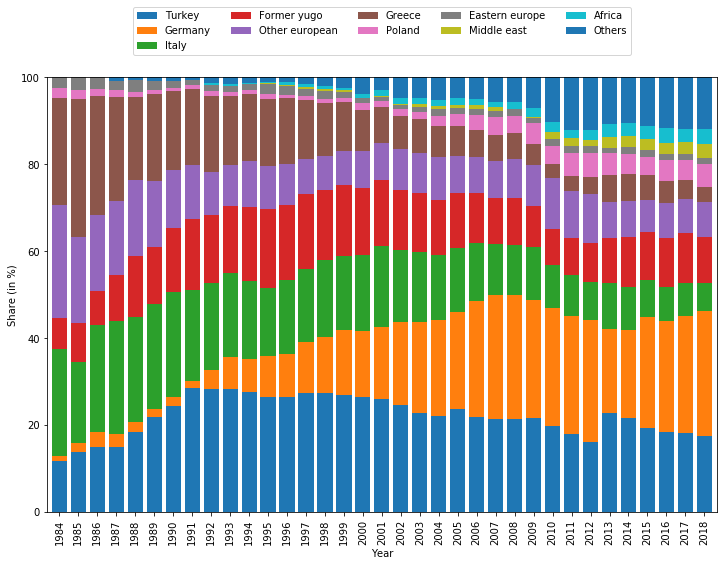

In [7]:
plot_country_origin_by_year(immig_2gen)

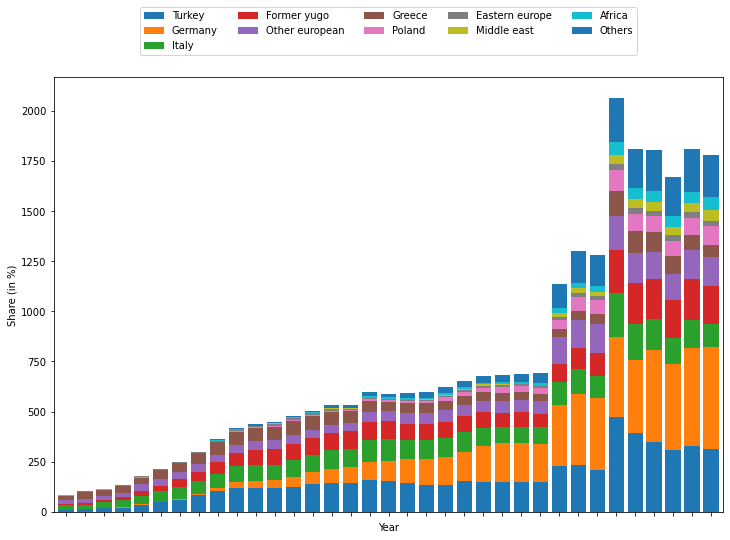

In [48]:
plot_country_origin_by_year(immig_2gen)

Text(0.5, 1, 'Heatmap of Occupational choice vs Country of origin')

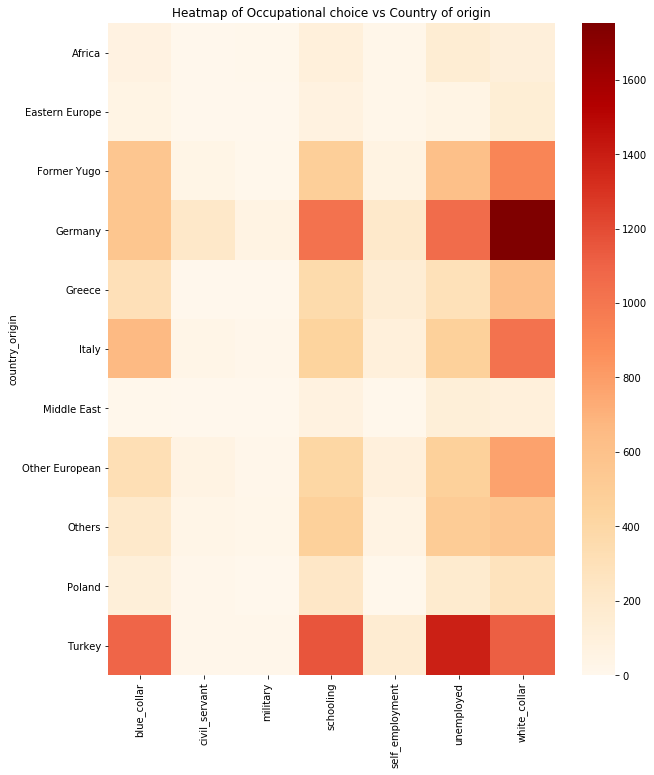

In [8]:
cols = ['blue_collar','white_collar','schooling','unemployed','military','self_employment','civil_servant']
plot_occupation_by_country_origin(immig_2gen,cols):

Text(0.5, 1, 'Heatmap of Occupational choice vs native Germany')

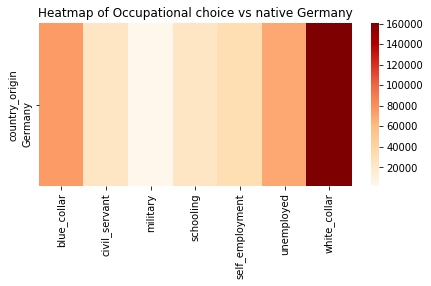

In [11]:
plot_occupation_by_country_origin(nat_germ,cols):

Text(0.5, 1, 'Heatmap of Occupational choice vs Father edu')

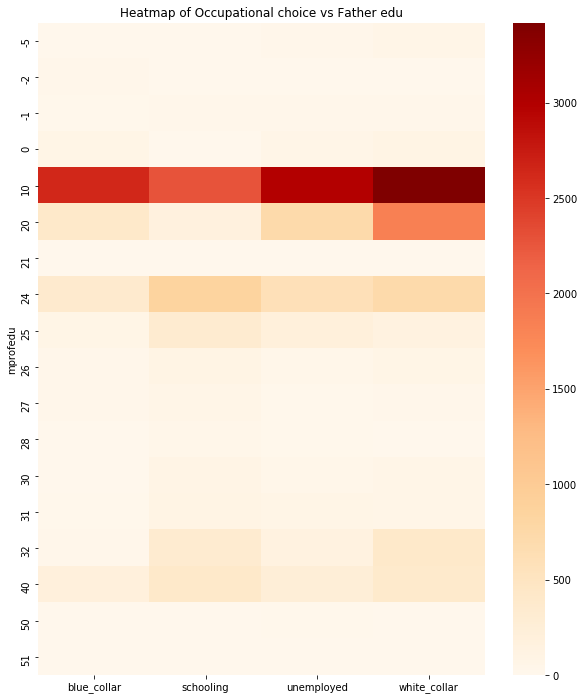

In [16]:
_heatmap = pd.pivot_table(immig_2gen, values=cols,
                                 index='mprofedu',
                                 aggfunc={v : np.sum for v in cols})

fig = plt.figure(figsize=(10,12))
r = sns.heatmap(_heatmap, cmap='OrRd')
r.set_title("Heatmap of Occupational choice vs Father edu")

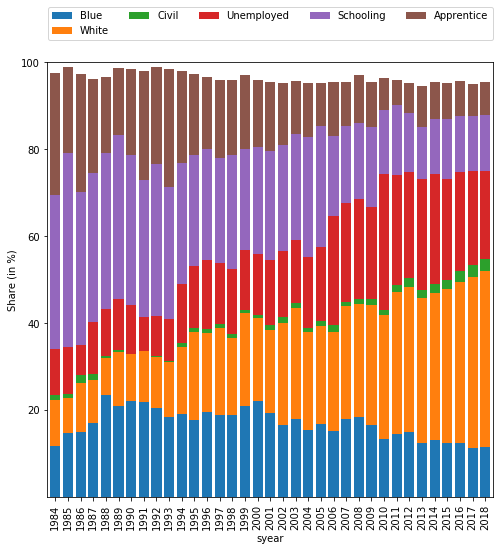

In [12]:
plot_decisions_by_year(immig_2gen)

In [70]:
Turkey = immig_2gen[immig_2gen['country_origin']=="Turkey"]

In [55]:
German = immig_2gen[immig_2gen['country_origin']=="Germany"]

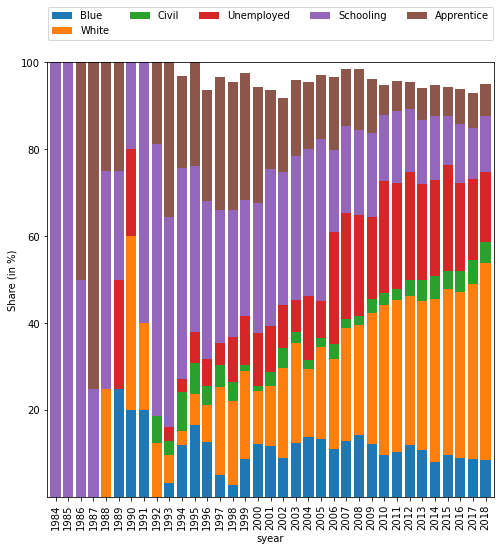

In [71]:
plot_decisions_by_year(German)

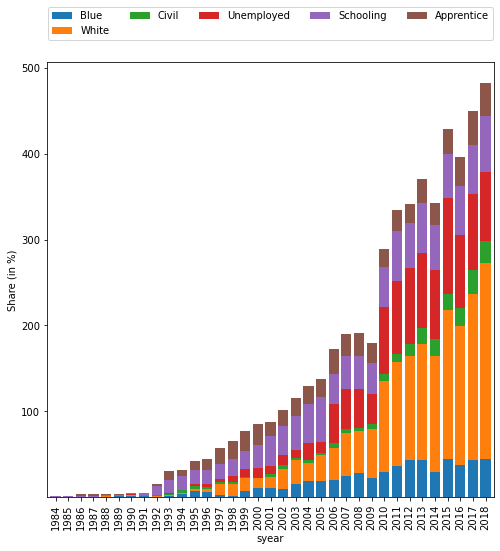

In [76]:
plot_abs_decisions_by_year(German)

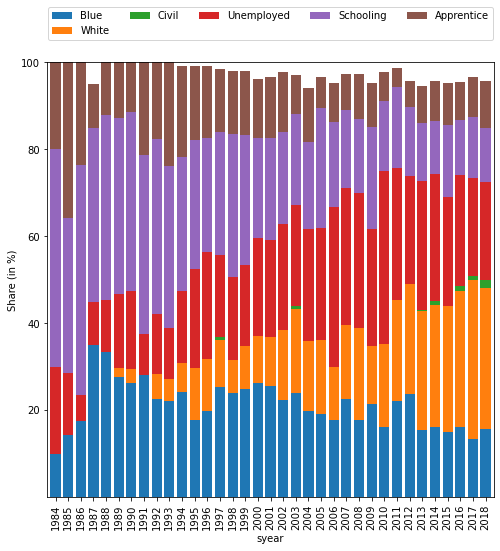

In [72]:
plot_decisions_by_year(Turkey)

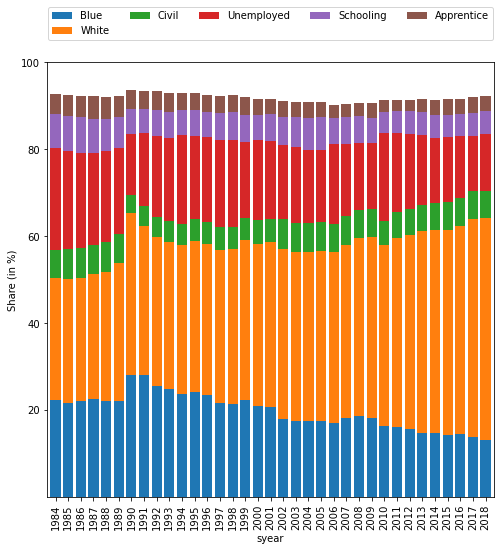

In [73]:
plot_decisions_by_year(nat_germ)

### Cleaning for regression

In [20]:
_immig_2gen_nat = immig_2gen_nat[['pid','occ_choices','sex','bioage',
                                  'country_origin','migback',
                                  'fsedu','msedu','locchildh',
                                  'fprofedu','mprofedu','fprofstat','mprofstat']]

In [21]:
_immig_2gen_nat['male'] = np.where(_immig_2gen_nat['sex'] == 1, 1, 0)

In [14]:
_immig_2gen_nat['occ_choices'].value_counts()

white_collar       168006
blue_collar         79455
unemployed          75043
self_employment     32426
schooling           28877
civil_servant       24484
apprentice          17407
military             1900
Name: occ_choices, dtype: int64

In [16]:
# replace the negative datapoints with NaN value
_immig_2gen_nat[_immig_2gen_nat.apply(lambda x: x.astype(str).str.contains('-'))] = np.nan

In [17]:
cols = ['fsedu','msedu','fprofedu','mprofedu','fprofstat','mprofstat']
for col in cols:
    _immig_2gen_nat[col] = np.where(_immig_2gen_nat[col] == 0.0, np.nan, _immig_2gen_nat[col])

In [19]:
_immig_2gen_nat[]

pid                    0
occ_choices            0
sex                    0
bioage                 0
country_origin         0
migback                0
fsedu              45844
msedu              36018
locchildh          25725
fprofedu           45832
mprofedu           44660
fprofstat          79641
mprofstat         183547
dtype: int64